In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def multitime_to_pd(list):
    df = pd.DataFrame(columns = ['Mean', 'Std.Dev.', 'Min', 'Median', 'Max'], index = ['real', 'user', 'sys'])
    for i in range (3, 6):
        row = re.sub(' +', ' ', list[i]).split(" ")[:6]
        df.loc[row[0]] = row[1:]
    return(df)

def plot_times(df):
    ax = df.plot(x='name', y='time', kind='bar')
    ax.set_xlabel(None)
    ax.set_ylabel('Execution time (s)')
    ax.set_title('Execution Time Comparison')
    for i, v in enumerate(df['time']):
        ax.text(i, v, str(v), ha='center', va='bottom', rotation=90)
    plt.show()
    
    
def plot_grouped(groups, times):
    # place group labels
    x = np.arange(len(groups))  # the label locations
    width = 0.15  # the width of the bars
    offset = -0.15

    fig, ax = plt.subplots()

    for attribute, measurement in times.items():
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3, rotation=90)
        offset += width

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Execution time (s)')
    ax.set_title('Execution Time Comparison')
    ax.set_xticks(x + 0.1, groups)
    ax.legend(loc='upper left', ncol=3)
    #ax.set_ylim(0, 6)

    plt.show()

In [3]:
!export N_RUNS=3

Csmall = !multitime -q -n 3 ./Benchmarks/Caesar-cipher/Small_dataset/C/benchmark
Cmedium = !multitime -q -n 3 ./Benchmarks/Caesar-cipher/Medium_dataset/C/benchmark
Clarge = !multitime -q -n 3 ./Benchmarks/Caesar-cipher/Large_dataset/C/benchmark
dfCsmall=multitime_to_pd(Csmall)
dfCmedium=multitime_to_pd(Cmedium)
dfClarge=multitime_to_pd(Clarge)


WASMsmall = !multitime -q -n 3 wasmtime ./Benchmarks/Caesar-cipher/Small_dataset/WASM/benchmark.wasm
WASMmedium = !multitime -q -n 3 wasmtime ./Benchmarks/Caesar-cipher/Medium_dataset/WASM/benchmark.wasm
WASMlarge = !multitime -q -n 3 wasmtime ./Benchmarks/Caesar-cipher/Large_dataset/WASM/benchmark.wasm
dfWASMsmall=multitime_to_pd(WASMsmall)
dfWASMmedium=multitime_to_pd(WASMmedium)
dfWASMlarge=multitime_to_pd(WASMlarge)

JSsmall = !multitime -q -n 3 node ./Benchmarks/Caesar-cipher/Small_dataset/WASM+JS/benchmark.js
JSmedium = !multitime -q -n 3 node ./Benchmarks/Caesar-cipher/Medium_dataset/WASM+JS/benchmark.js
JSlarge = !multitime -q -n 3 node ./Benchmarks/Caesar-cipher/Large_dataset/WASM+JS/benchmark.js
dfJSsmall=multitime_to_pd(JSsmall)
dfJSmedium=multitime_to_pd(JSmedium)
dfJSlarge=multitime_to_pd(JSlarge)

DockerCsmall = !multitime -q -n 3 docker run --rm small_docker_c
DockerCmedium = !multitime -q -n 3 docker run --rm medium_docker_c
DockerClarge = !multitime -q -n 3 docker run --rm large_docker_c
dfDockerCsmall=multitime_to_pd(DockerCsmall)
dfDockerCmedium=multitime_to_pd(DockerCmedium)
dfDockerClarge=multitime_to_pd(DockerClarge)

DockerRuntimesmall = !multitime -q -n 3 docker run --rm small_docker_runtime
DockerRuntimemedium = !multitime -q -n 3 docker run --rm medium_docker_runtime
DockerRuntimelarge = !multitime -q -n 3 docker run --rm large_docker_runtime
dfDockerRuntimesmall=multitime_to_pd(DockerRuntimesmall)
dfDockerRuntimemedium=multitime_to_pd(DockerRuntimemedium)
dfDockerRuntimelarge=multitime_to_pd(DockerRuntimelarge)

DockerWASMsmall = !multitime -q -n 3 docker run --rm --runtime=io.containerd.wasmedge.v1 --platform=wasi/wasm32 small_docker_wasm
DockerWASMmedium = !multitime -q -n 3 docker run --rm --runtime=io.containerd.wasmedge.v1 --platform=wasi/wasm32 medium_docker_wasm
DockerWASMlarge = !multitime -q -n 3 docker run --rm --runtime=io.containerd.wasmedge.v1 --platform=wasi/wasm32 large_docker_wasm
dfDockerWASMsmall=multitime_to_pd(DockerWASMsmall)
dfDockerWASMmedium=multitime_to_pd(DockerWASMmedium)
dfDockerWASMlarge=multitime_to_pd(DockerWASMlarge)


In [4]:
# Extract the execution time values that you want to plot
name_values = ['Csmall', 'Cmedium', 'Clarge', 
               'WASMsmall', 'WASMmedium', 'WASMlarge', 
               'JSsmall', 'JSmedium', 'JSlarge', 
               'DockerCsmall', 'DockerCmedium', 'DockerClarge',
               'DockerRuntimesmall', 'DockerRuntimemedium', 'DockerRuntimelarge',
               'DockerWASMsmall', 'DockerWASMmedium', 'DockerWASMlarge',
              ]

time_values = [float(dfCsmall.loc['real', 'Mean']), float(dfCmedium.loc['real', 'Mean']), float(dfClarge.loc['real', 'Mean']), 
               float(dfWASMsmall.loc['real', 'Mean']), float(dfWASMmedium.loc['real', 'Mean']), float(dfWASMlarge.loc['real', 'Mean']),
               float(dfJSsmall.loc['real', 'Mean']), float(dfJSmedium.loc['real', 'Mean']), float(dfJSlarge.loc['real', 'Mean']),
               float(dfDockerCsmall.loc['real', 'Mean']), float(dfDockerCmedium.loc['real', 'Mean']), float(dfDockerClarge.loc['real', 'Mean']),
               float(dfDockerRuntimesmall.loc['real', 'Mean']), float(dfDockerRuntimemedium.loc['real', 'Mean']), float(dfDockerRuntimelarge.loc['real', 'Mean']),
               float(dfDockerWASMsmall.loc['real', 'Mean']), float(dfDockerWASMmedium.loc['real', 'Mean']), float(dfDockerWASMlarge.loc['real', 'Mean']),
              ]

# Create a new dataframe to store the extracted values
df = pd.DataFrame({'name': name_values, 'time': time_values})
df

,name,time
0,Csmall,0.007
1,Cmedium,0.009
2,Clarge,0.016
3,WASMsmall,0.028
4,WASMmedium,0.052
5,WASMlarge,0.152
6,JSsmall,0.496
7,JSmedium,1.023
8,JSlarge,1.898
9,DockerCsmall,1.111


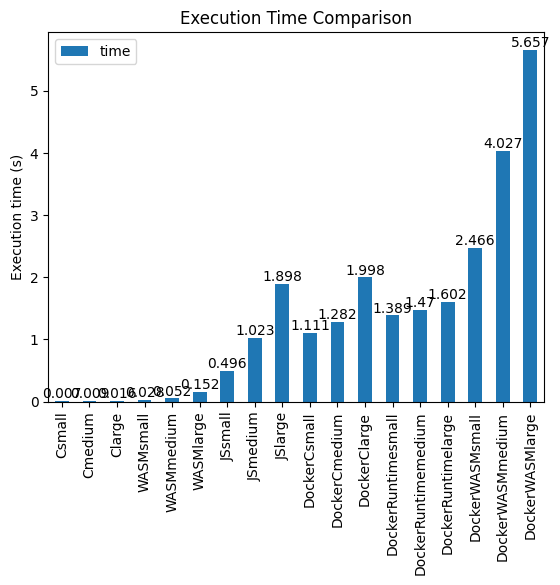

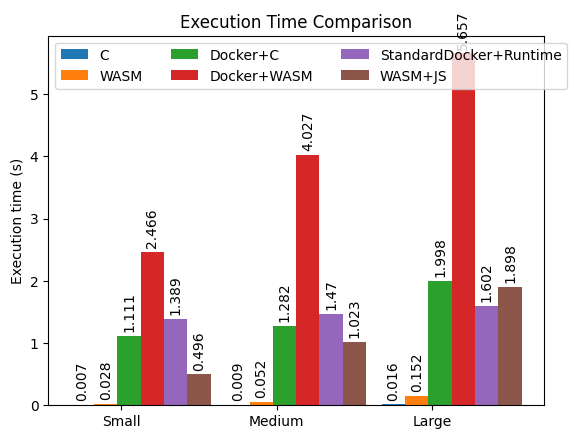

In [43]:
groups = ("Small", "Medium", "Large")
times = {
    'C': (float(dfCsmall.loc['real', 'Mean']), float(dfCmedium.loc['real', 'Mean']), float(dfClarge.loc['real', 'Mean'])),
    'WASM': (float(dfWASMsmall.loc['real', 'Mean']), float(dfWASMmedium.loc['real', 'Mean']), float(dfWASMlarge.loc['real', 'Mean'])),
    'Docker+C': (float(dfDockerCsmall.loc['real', 'Mean']), float(dfDockerCmedium.loc['real', 'Mean']), float(dfDockerClarge.loc['real', 'Mean'])),
    'Docker+WASM': (float(dfDockerWASMsmall.loc['real', 'Mean']), float(dfDockerWASMmedium.loc['real', 'Mean']), float(dfDockerWASMlarge.loc['real', 'Mean'])),
    'StandardDocker+Runtime': (float(dfDockerRuntimesmall.loc['real', 'Mean']), float(dfDockerRuntimemedium.loc['real', 'Mean']), float(dfDockerRuntimelarge.loc['real', 'Mean'])),
    'WASM+JS': (float(dfJSsmall.loc['real', 'Mean']), float(dfJSmedium.loc['real', 'Mean']), float(dfJSlarge.loc['real', 'Mean'])),
    }

plot_times(df)

plot_grouped(groups, times)
